In [87]:
import pickle

In [88]:

with open('XGBoostRegressor.pkl', 'rb') as f:
    XGBoost = pickle.load(f)
with open('ARIMA.pkl', 'rb') as f:
    ARIMA = pickle.load(f)
with open('SARIMAX.pkl', 'rb') as f:
    SARIMAX = pickle.load(f)


In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df=pd.read_csv("time.csv")
df=pd.DataFrame(df)
df=df.iloc[:,:-1]
df['consumption']=df['consumption'].astype('int')
df.head()

,date,connection,population,actual_limit,factor,consumption
0,2017-01-01,4037,19373,2615355,1.193640,3121791
1,2017-01-02,4038,19378,2616030,1.167478,3054157
2,2017-01-03,4039,19383,2616705,1.145279,2996857
3,2017-01-04,4039,19383,2616705,1.118182,2925951
4,2017-01-05,4040,19387,2617245,1.136099,2973448


In [91]:
plot_df= pd.DataFrame()

In [92]:
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2049-12-31')
date_range = pd.date_range(start_date, end_date)

predictions_df = pd.DataFrame({'date': date_range})

predictions_df['year'] = predictions_df['date'].dt.year
predictions_df['month'] = predictions_df['date'].dt.month
predictions_df['day'] = predictions_df['date'].dt.day
predictions_df['day_of_week'] = predictions_df['date'].dt.dayofweek


predictions = XGBoost.predict(predictions_df[['year', 'month', 'day', 'day_of_week']])
plot_df['date']=predictions_df['date']

plot_df['XGBoost prediction']=predictions


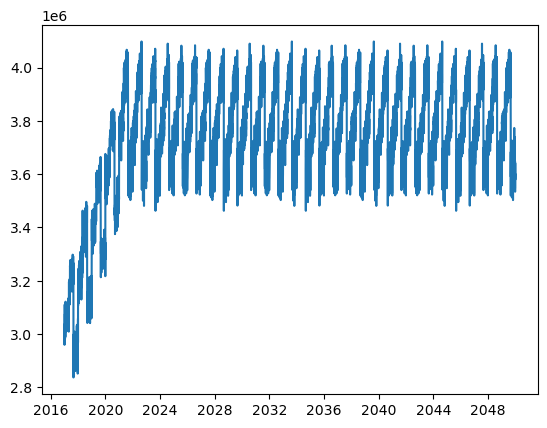

In [93]:
plt.plot(plot_df['date'],plot_df['XGBoost prediction'])
plt.show()

In [94]:
plot_df['Sarimax prediction']= SARIMAX.predict(start=0,end=1826,dynamic=True)

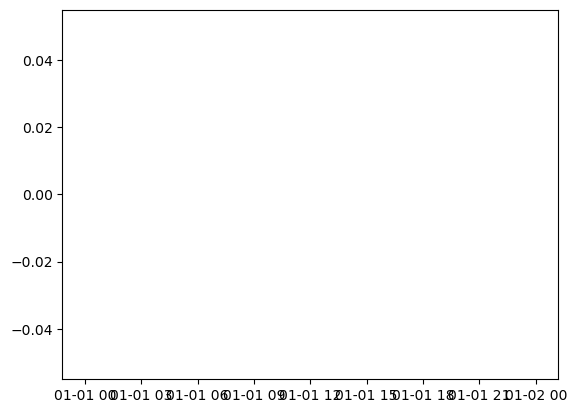

In [95]:
plt.plot(plot_df['date'],plot_df['Sarimax prediction'])
plt.show()

<Axes: >

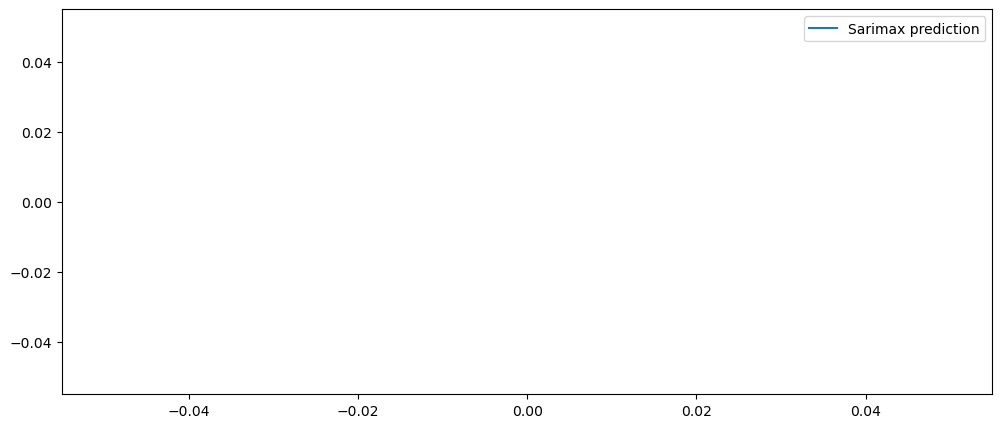

In [96]:
plot_df[['Sarimax prediction']].plot(figsize=(12,5))